In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD

_t_max =1000
_cmap = plt.cm.jet

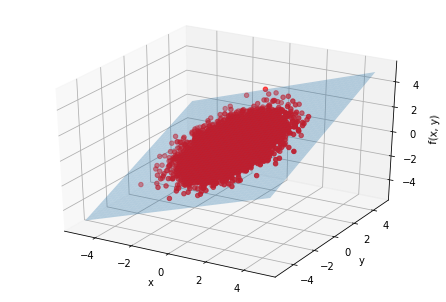

In [2]:
#data
data = data_generate.Data(d=2,N=10000,err=0.5)
X,y,w_star = data.generate_linear()

def add(x,y):
    return (x + y) /2

x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Z = add(X1,X2)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.scatter(X.T[0],X.T[1],y,c="red")
ax.plot_surface(X1, X2, Z,alpha=0.3)
plt.show()

In [3]:
#SGD
w_init = [3,3]
loss_transition = []
algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.01)
f = model_opt.Quadratic()

In [4]:
for i in tqdm(algo):
    algo.update(model=f,data=X,label=y)
    tmp = X.dot(algo.w) - y
    loss_transition.append(np.sum(tmp ** 2))

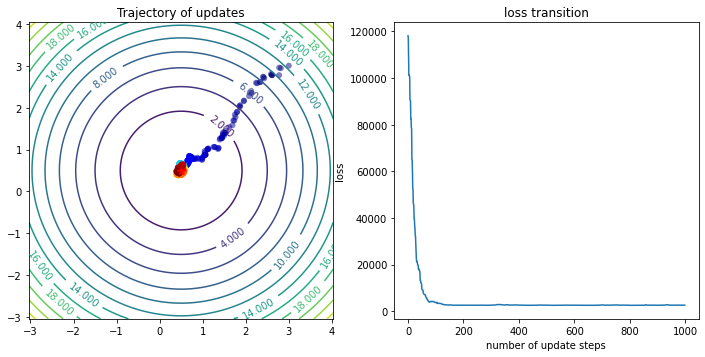

In [5]:
w_store = np.array(algo.wstore)
# 目的関数の真の値

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)

ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

In [6]:
#GD
w_init = [3,3]
loss_transition = []
algo = algo_GD.GD(w_init=w_init,t_max=_t_max,a=0.01)
f = model_opt.Quadratic()

In [7]:
for i in tqdm(algo):
    algo.update(model=f,data=X,label=y)
    tmp = X.dot(algo.w) - y
    loss_transition.append(np.sum(tmp ** 2))

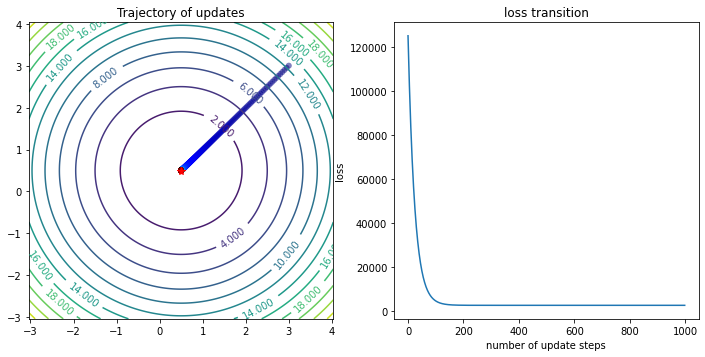

In [8]:
w_store = np.array(algo.wstore)
# 目的関数の真の値

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)

ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)